# Assignment - Image Classification with CNNs
![CIFAR10](https://miro.medium.com/max/964/1*syyml8q8s1Yt-iEea5m1Ag.png)

[CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) is a small toy data set for image classifaction. 

* It has 60k images from ten diffenrent classes (like car, airplane, horse,..)
* The RGB images are of size 32x32 pixels  

In [29]:
#import needed libs
from __future__ import print_function
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import os

#some vars to controll the training -> use them in your code
batch_size = 32
num_classes = 10 #fixed!
epochs = 10

# Get the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Task:
* visualize some sample images from different classes
* build and train the ***AlexNet*** CNN architecture from the lecture, use the following Keras layers:
    * overview: https://keras.io/api/layers/
    * 2d convolution: https://keras.io/api/layers/convolution_layers/convolution2d/
    * Fully Connected (=Matrix Multiplication MLP): https://keras.io/api/layers/core_layers/dense/
    * Pooling: https://keras.io/api/layers/pooling_layers/max_pooling2d/   
* use 'relu' functions for the non-linear activation -> https://keras.io/api/layers/activation_layers/relu/
* optimize the learning hyper-paramters to get the best  test accuracy

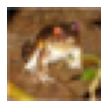

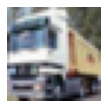

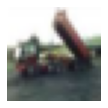

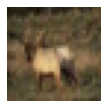

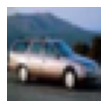

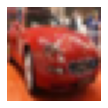

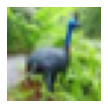

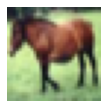

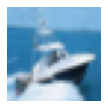

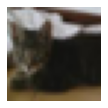

In [67]:
# https://towardsdatascience.com/implementing-alexnet-cnn-architecture-using-tensorflow-2-0-and-keras-2113e090ad98
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


for i in range(0,10):
    plt.figure(figsize=(10,10))
    ax = plt.subplot(5,5,i+1)
    plt.imshow(np.reshape(x_train[i,:],(32,32,3)))
    plt.axis('off')

In [17]:
# AlexNet Optimization
inputs = keras.Input(shape=(32, 32, 3))
l1 = Rescaling(scale=1.0 / 255)(inputs)

l2 = Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(l1)
l3 = Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(l2)
l4 = Dropout(rate=.2)(l3)

l5 = Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(l4) 
l6 = Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(l5)
l7 = Dropout(rate=.2)(l6)

l8 = Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(l7) 
l9 = Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(l8)
l10 = Dropout(rate=.2)(l9)   

l11 = Flatten()(l10) 

l12 = Dense(128, activation="relu")(l11)
l13= Dropout(rate=.2)(l12) 


outputs = Dense(num_classes, activation="softmax")(l13)

In [36]:
inputs = keras.Input(shape=(32, 32, 3))
l1 = Rescaling(scale=1.0 / 255)(inputs)

l2 = Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(l1)  # 30, 30, 96
l3 = MaxPooling2D(pool_size=(3, 3))(l2)                             # 10, 10, 96
l4 = BatchNormalization()(l3)

l5 = Conv2D(filters=256, kernel_size=(3, 3), activation="relu")(l4) # 8, 8, 384
l6 = Conv2D(filters=256, kernel_size=(3, 3), activation="relu")(l5) # 6, 6, 256
l7 = MaxPooling2D(pool_size=(3, 3))(l6)                             # 2, 2, 256
l8 = BatchNormalization()(l7)

l9 = Flatten()(l8)                                                  # 1024

l10 = Dense(1024, activation="relu")(l9)                             # 512
l11 = Dropout(rate=.2)(l10)

l12 = Dense(1024, activation="relu")(l11)                            # 512
l13 = Dropout(rate=.2)(l12)

outputs = Dense(num_classes, activation="softmax")(l13)             # 10

In [37]:
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
rescaling_4 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 10, 64)        256       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 256)         147712    
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 6, 6, 256)         5900

In [38]:
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', 
              loss="categorical_crossentropy", 
              metrics=[keras.metrics.CategoricalAccuracy(name="acc")])

In [33]:
checkpoint_filepath = './tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='acc',
    save_freq='epoch')

In [39]:
# Train the model for 10 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(64)
print("Fit on Dataset")
history = model.fit(dataset, epochs=15, callbacks=[model_checkpoint_callback, tf.keras.callbacks.TerminateOnNaN()])

Fit on Dataset
Epoch 1/15
782/782 [==============================] - 38s 49ms/step - loss: 1.5198 - acc: 0.4675
Epoch 2/15
782/782 [==============================] - 43s 56ms/step - loss: 0.9030 - acc: 0.6864
Epoch 3/15
782/782 [==============================] - 43s 56ms/step - loss: 0.7006 - acc: 0.7574
Epoch 4/15
782/782 [==============================] - 45s 58ms/step - loss: 0.5616 - acc: 0.8041
Epoch 5/15
782/782 [==============================] - 48s 62ms/step - loss: 0.4540 - acc: 0.8402
Epoch 6/15
782/782 [==============================] - 48s 61ms/step - loss: 0.3727 - acc: 0.8675
Epoch 7/15
782/782 [==============================] - 50s 63ms/step - loss: 0.3054 - acc: 0.8922
Epoch 8/15
782/782 [==============================] - 52s 66ms/step - loss: 0.2531 - acc: 0.9114
Epoch 9/15
782/782 [==============================] - 50s 64ms/step - loss: 0.2158 - acc: 0.9246
Epoch 10/15
782/782 [==============================] - 52s 66ms/step - loss: 0.1831 - acc: 0.9364
Epoch 11/15
78

In [40]:
val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)
result = model.evaluate(val_dataset)

157/157 [==============================] - 2s 14ms/step - loss: 1.3047 - acc: 0.7586


<hr>

## Hyperparameter Tuning

In [26]:
def build_model(hp):
    inputs = keras.Input(shape=(32, 32, 3))
    l1 = Rescaling(scale=1.0 / 255)(inputs)
    l2 = Conv2D(filters=
                hp.Int('filters', min_value=32, max_value=224, step=64), kernel_size=(3, 3), activation="relu")(l1)
    l3 = MaxPooling2D(pool_size=(3, 3))(l2)                           
    l4 = LayerNormalization()(l3)
    l5 = Conv2D(filters=384, kernel_size=(3, 3), activation="relu")(l4) 
    l6 = Conv2D(filters=256, kernel_size=(3, 3), activation="relu")(l5)
    l7 = MaxPooling2D(pool_size=(3, 3))(l6)                            
    l8 = Flatten()(l7)    
    
    l9 = Dense(hp.Choice('mlp1', values=[128, 256, 512, 1028]), activation="relu")(l8)
    l10 = Dense(hp.Choice('mlp2', values=[128, 256, 512, 1028]), activation="relu")(l9)
    outputs = Dense(num_classes, activation="softmax")(l10)
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', 
              loss="categorical_crossentropy", 
              metrics=[keras.metrics.CategoricalAccuracy(name="acc")])
    return model

In [27]:
import kerastuner
tuner = kerastuner.tuners.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=10,
    directory='tuning'
)

In [28]:
val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)

In [ ]:
%%time
tuner.search(dataset, validation_data=val_dataset)

In [30]:
models = tuner.get_best_models(num_models=2)

In [33]:
tuner.results_summary()

In [34]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(dataset, epochs=50)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

In [ ]:
#hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
#hypermodel.fit(dataset, epochs=best_epoch)


In [ ]:
# evaluate with test data
eval_result = hypermodel.evaluate(val_dataset)
print("[test loss, test accuracy]:", eval_result)